- This notebook is to test the RF performance with default hyperparameters

In [1]:
import sys
sys.path.append("../src/models")
sys.path.append("../src")
sys.path.append("../")

In [2]:
from model_comparison import *

In [13]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import warnings
warnings.filterwarnings("ignore")

In [4]:
# Baseline
df01 = pd.read_csv('df_total_surfactants_baseline_20250711.csv')
df02 = pd.read_csv('df_total_binary_baseline_log_20250930.csv')
df03 = pd.read_csv('df_total_amphiphiles_baseline_20250710.csv')
# VICGAE
df11 = pd.read_csv('df_total_surfactants_VICGAE_20250707.csv')
df12 = pd.read_csv('df_total_binary_VICGAE_log_20250930.csv')
df13 = pd.read_csv('df_total_amphiphiles_VICGAE_20250707.csv')
# Chemprop
df21 = pd.read_csv('df_total_surfactants_chemprop_20250707.csv')
df22 = pd.read_csv('df_total_binary_chemprop_log_20250930.csv')
df23 = pd.read_csv('df_total_amphiphiles_chemprop_20250707.csv')
# Chemeleon
df31 = pd.read_csv('df_total_surfactants_chemeleon_20250707.csv')
df32 = pd.read_csv('df_total_binary_chemeleon_log_20250930.csv')
df33 = pd.read_csv('df_total_amphiphiles_chemleon_20250702.csv')
# SMI-TED
df41 = pd.read_csv('df_total_surfactants_smi-ted_20250709.csv')
df42 = pd.read_csv('df_total_binary_SMI-TED_log_20250930.csv')
df43 = pd.read_csv('df_total_amphiphiles_smi-ted_20250709.csv')

Baseline
[Run 1] RMSE: 0.8383, R²: 0.5074
[Run 2] RMSE: 0.8498, R²: 0.4227
[Run 3] RMSE: 0.8495, R²: 0.3986
[Run 4] RMSE: 0.9105, R²: 0.3639
[Run 5] RMSE: 0.8269, R²: 0.5035
[Run 6] RMSE: 0.8889, R²: 0.3990
[Run 7] RMSE: 0.9024, R²: 0.3351
[Run 8] RMSE: 0.7528, R²: 0.5014
[Run 9] RMSE: 0.8900, R²: 0.3753
[Run 10] RMSE: 0.8502, R²: 0.3694


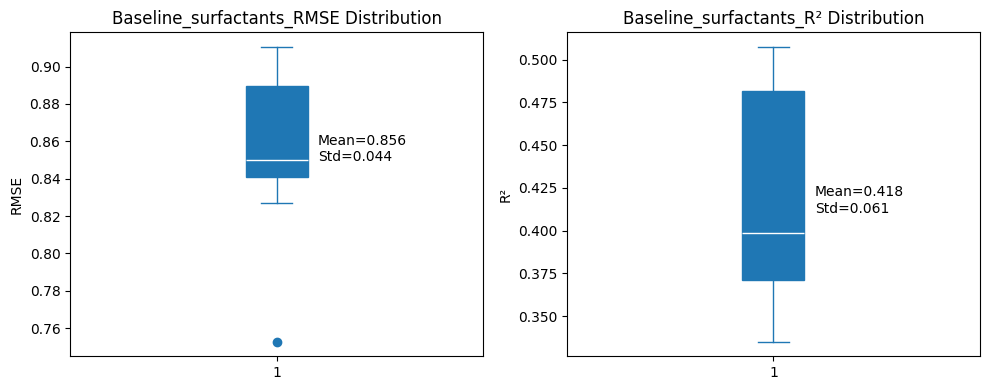

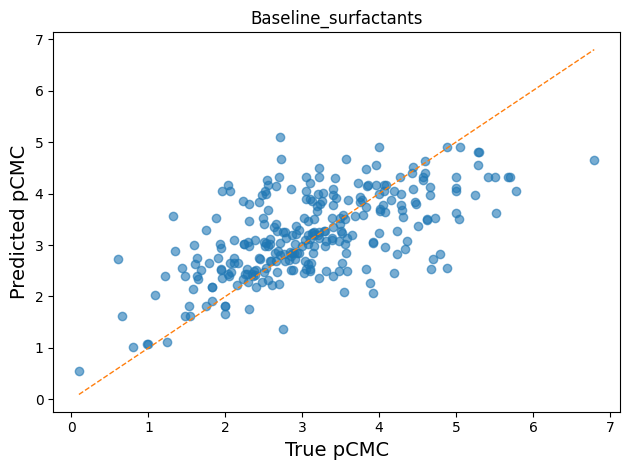

VICGAE
[Run 1] RMSE: 0.6907, R²: 0.6656
[Run 2] RMSE: 0.6102, R²: 0.7023
[Run 3] RMSE: 0.6777, R²: 0.6173
[Run 4] RMSE: 0.7563, R²: 0.5611
[Run 5] RMSE: 0.6581, R²: 0.6855
[Run 6] RMSE: 0.7269, R²: 0.5980
[Run 7] RMSE: 0.6675, R²: 0.6363
[Run 8] RMSE: 0.6355, R²: 0.6446
[Run 9] RMSE: 0.6641, R²: 0.6521
[Run 10] RMSE: 0.6759, R²: 0.6014


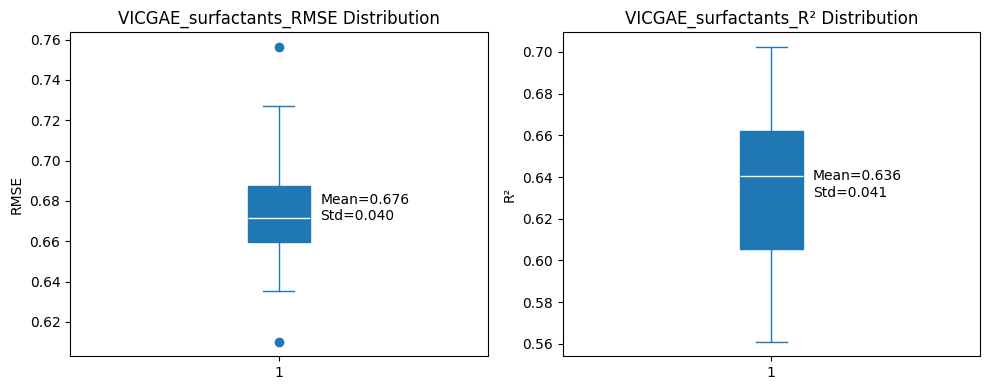

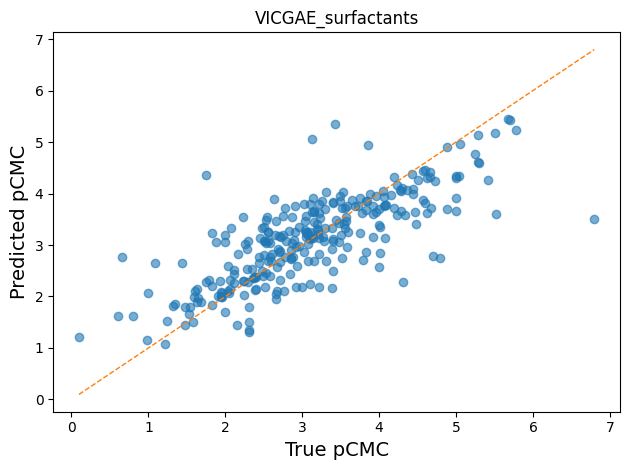

Chemprop
[Run 1] RMSE: 0.5492, R²: 0.7886
[Run 2] RMSE: 0.5600, R²: 0.7493
[Run 3] RMSE: 0.5441, R²: 0.7533
[Run 4] RMSE: 0.6346, R²: 0.6910
[Run 5] RMSE: 0.5510, R²: 0.7795
[Run 6] RMSE: 0.5752, R²: 0.7484
[Run 7] RMSE: 0.5249, R²: 0.7751
[Run 8] RMSE: 0.5148, R²: 0.7667
[Run 9] RMSE: 0.5438, R²: 0.7668
[Run 10] RMSE: 0.5267, R²: 0.7580


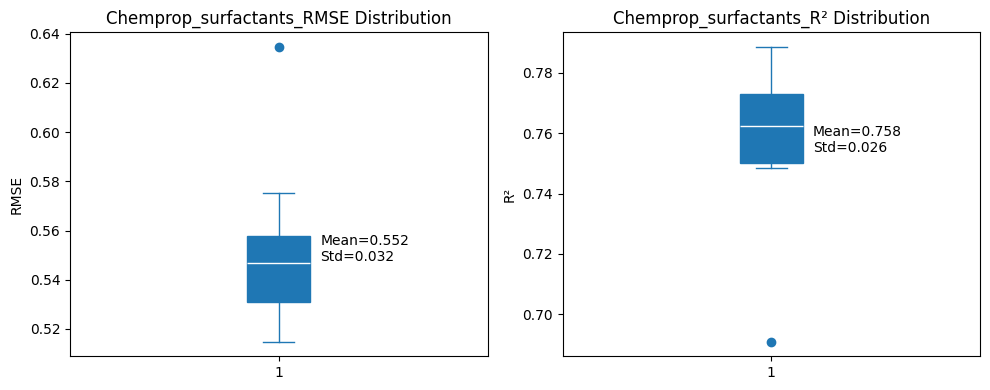

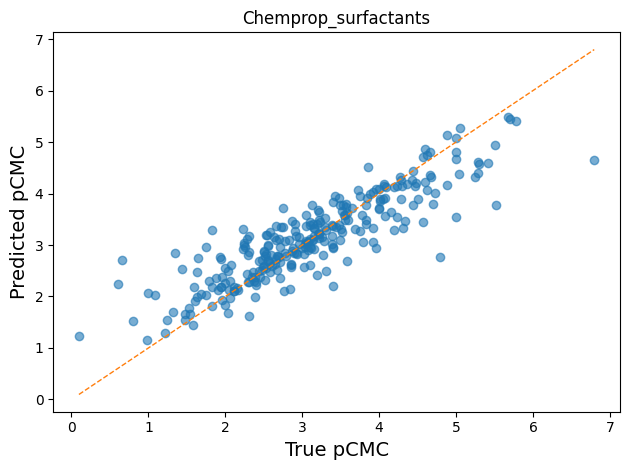

Chemeleon
[Run 1] RMSE: 0.5244, R²: 0.8072
[Run 2] RMSE: 0.4943, R²: 0.8047
[Run 3] RMSE: 0.5145, R²: 0.7794
[Run 4] RMSE: 0.6129, R²: 0.7118
[Run 5] RMSE: 0.5068, R²: 0.8135
[Run 6] RMSE: 0.5471, R²: 0.7724
[Run 7] RMSE: 0.5223, R²: 0.7773
[Run 8] RMSE: 0.4735, R²: 0.8027
[Run 9] RMSE: 0.5224, R²: 0.7847
[Run 10] RMSE: 0.5391, R²: 0.7465


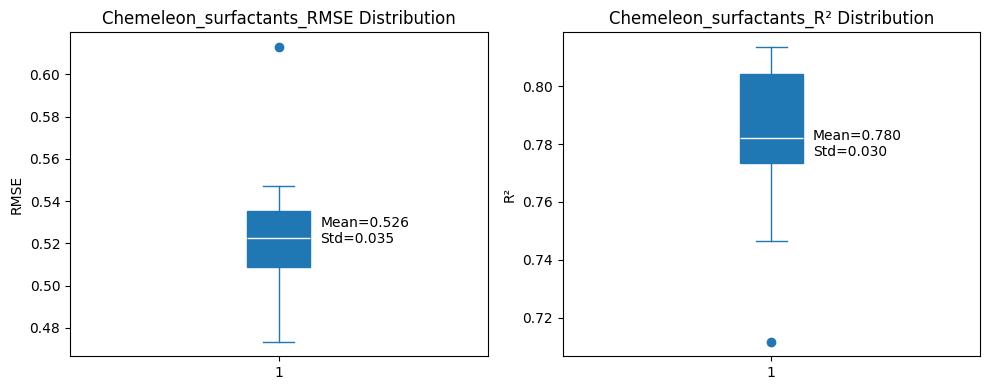

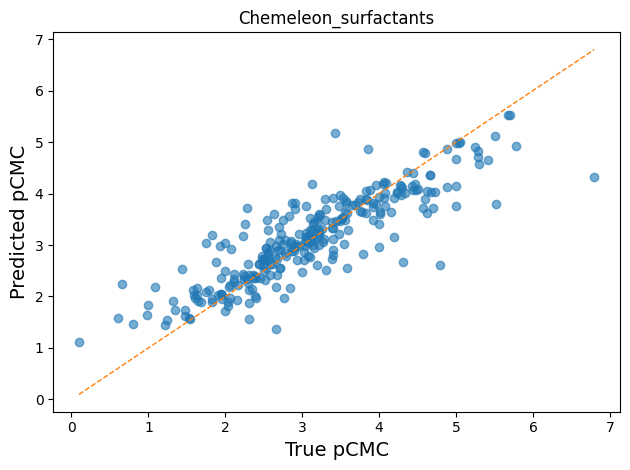

SMI-TED
[Run 1] RMSE: 0.5925, R²: 0.7539
[Run 2] RMSE: 0.5452, R²: 0.7623
[Run 3] RMSE: 0.5774, R²: 0.7222
[Run 4] RMSE: 0.6660, R²: 0.6596
[Run 5] RMSE: 0.6069, R²: 0.7325
[Run 6] RMSE: 0.6220, R²: 0.7057
[Run 7] RMSE: 0.5688, R²: 0.7359
[Run 8] RMSE: 0.5462, R²: 0.7375
[Run 9] RMSE: 0.6273, R²: 0.6897
[Run 10] RMSE: 0.6090, R²: 0.6765


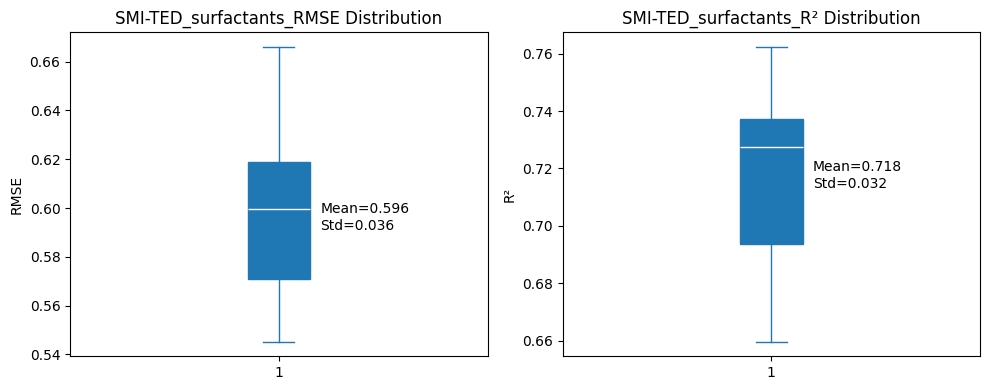

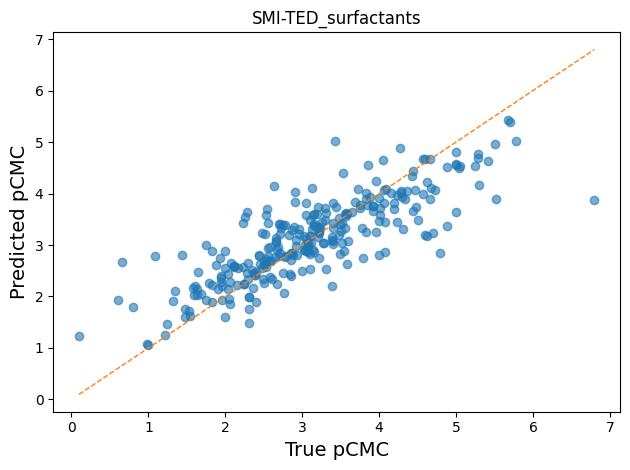

In [9]:
# For surfactants data
model_type = ['Baseline', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED']
dfs = [df01, df11, df21, df31, df41]

results_dict1 = {}

for df, model in zip(dfs, model_type):
    print(model)
    results_df = evaluate_model_performance_regression_no_normalization(df, data_type='surfactants', model_type=model)
    results_dict1[model] = results_df
    # visualize_latent_space(df, data_type='surfactants', model_type=model)

Baseline
ROC-AUC Score: 0.7901
ROC-AUC Score: 0.8345
ROC-AUC Score: 0.7963
ROC-AUC Score: 0.8374
ROC-AUC Score: 0.7606
ROC-AUC Score: 0.7660
ROC-AUC Score: 0.8523
ROC-AUC Score: 0.8290
ROC-AUC Score: 0.8519
ROC-AUC Score: 0.7871


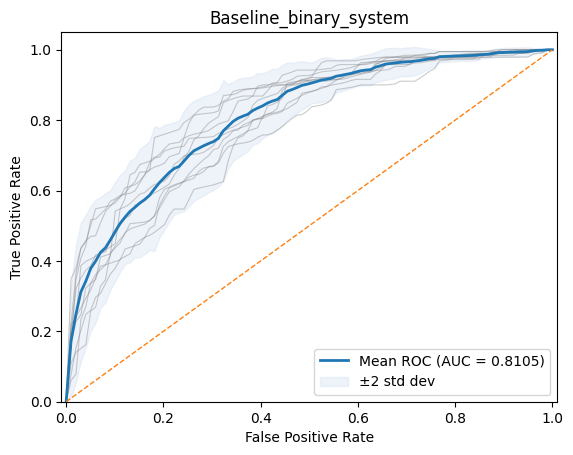

VICGAE
ROC-AUC Score: 0.6976
ROC-AUC Score: 0.7358
ROC-AUC Score: 0.6802
ROC-AUC Score: 0.7531
ROC-AUC Score: 0.6441
ROC-AUC Score: 0.6855
ROC-AUC Score: 0.7242
ROC-AUC Score: 0.6951
ROC-AUC Score: 0.6923
ROC-AUC Score: 0.7702


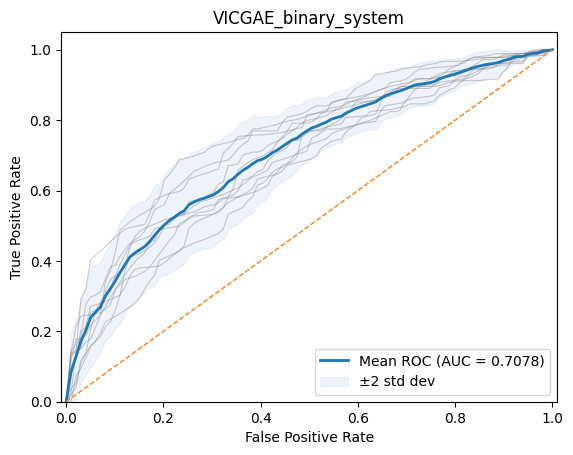

Chemprop
ROC-AUC Score: 0.7625
ROC-AUC Score: 0.7822
ROC-AUC Score: 0.7613
ROC-AUC Score: 0.7886
ROC-AUC Score: 0.7520
ROC-AUC Score: 0.7305
ROC-AUC Score: 0.7897
ROC-AUC Score: 0.7536
ROC-AUC Score: 0.7587
ROC-AUC Score: 0.7780


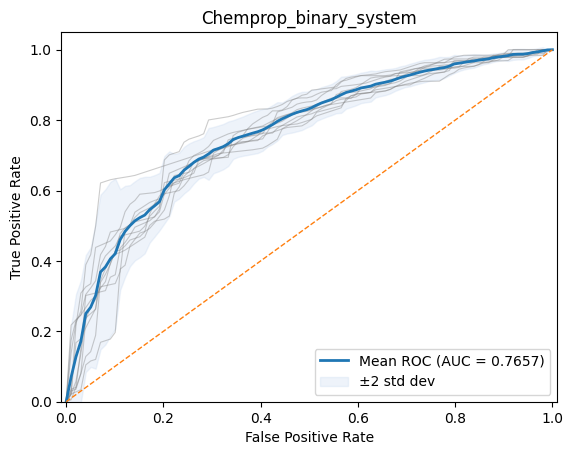

Chemeleon
ROC-AUC Score: 0.8111
ROC-AUC Score: 0.8099
ROC-AUC Score: 0.7748
ROC-AUC Score: 0.8471
ROC-AUC Score: 0.7848
ROC-AUC Score: 0.7928
ROC-AUC Score: 0.8572
ROC-AUC Score: 0.8244
ROC-AUC Score: 0.8380
ROC-AUC Score: 0.8495


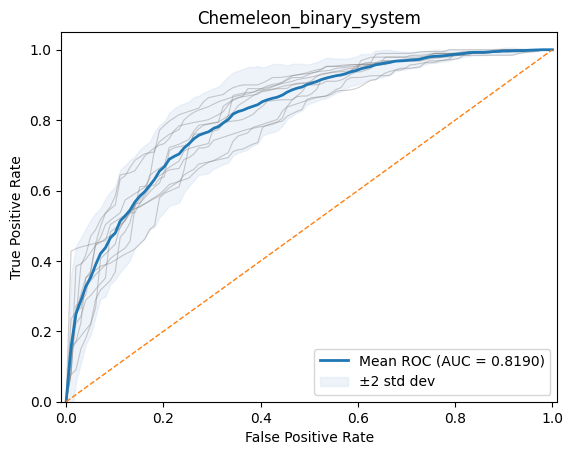

SMI-TED
ROC-AUC Score: 0.7864
ROC-AUC Score: 0.7971
ROC-AUC Score: 0.7562
ROC-AUC Score: 0.8283
ROC-AUC Score: 0.7636
ROC-AUC Score: 0.7539
ROC-AUC Score: 0.8323
ROC-AUC Score: 0.7829
ROC-AUC Score: 0.8314
ROC-AUC Score: 0.8045


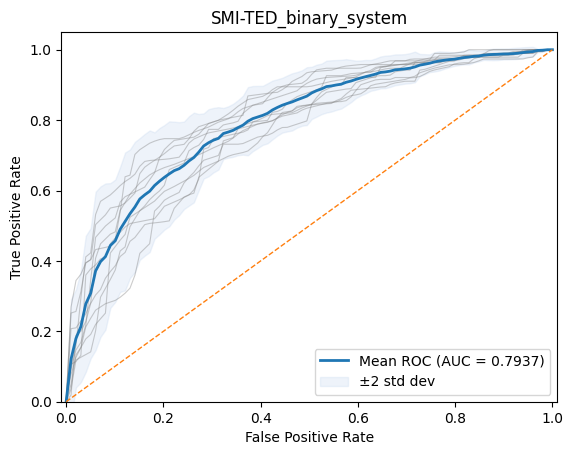

In [6]:
# For binary system data
model_type = ['Baseline', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED']
dfs = [df02, df12, df22, df32, df42]

results_dict2 = {}

for df, model in zip(dfs, model_type):
    print(model)
    results_df = evaluate_model_performance_d(df, label_col = 'miscibility', data_type='binary_system', model_type=model, save_plot_name='log_weight', output_csv_name='log_weight')
    results_dict2[model] = results_df
    # visualize_latent_space(df, data_type='binary_system', model_type=model)

Baseline
ROC-AUC Score: 0.8123
ROC-AUC Score: 0.8496
ROC-AUC Score: 0.7925
ROC-AUC Score: 0.8180
ROC-AUC Score: 0.7982
ROC-AUC Score: 0.8360
ROC-AUC Score: 0.8539
ROC-AUC Score: 0.8373
ROC-AUC Score: 0.8974
ROC-AUC Score: 0.7715


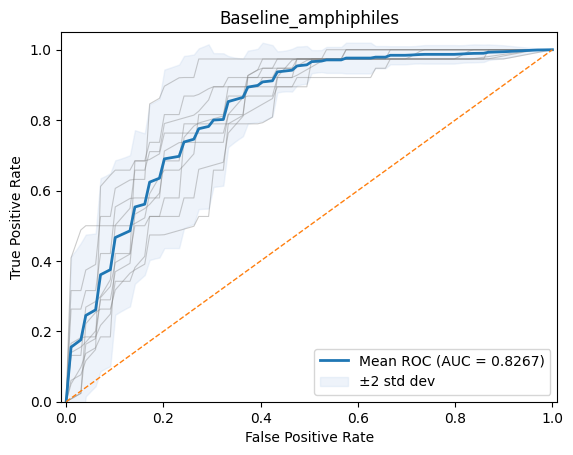

VICGAE
ROC-AUC Score: 0.8127
ROC-AUC Score: 0.8127
ROC-AUC Score: 0.7772
ROC-AUC Score: 0.8259
ROC-AUC Score: 0.8162
ROC-AUC Score: 0.8491
ROC-AUC Score: 0.8145
ROC-AUC Score: 0.8623
ROC-AUC Score: 0.8715
ROC-AUC Score: 0.7197


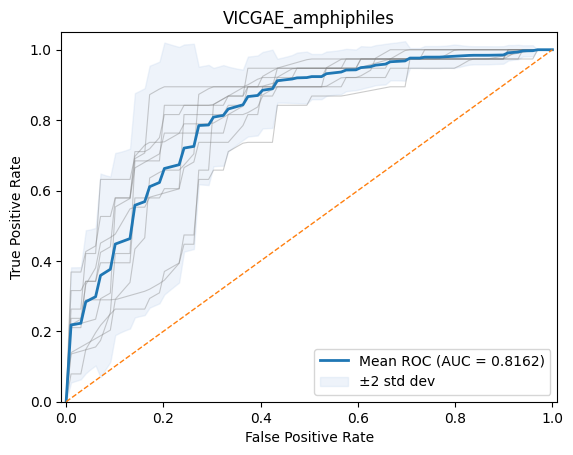

Chemprop
ROC-AUC Score: 0.8996
ROC-AUC Score: 0.8307
ROC-AUC Score: 0.8259
ROC-AUC Score: 0.8171
ROC-AUC Score: 0.8873
ROC-AUC Score: 0.9298
ROC-AUC Score: 0.8754
ROC-AUC Score: 0.8531
ROC-AUC Score: 0.8904
ROC-AUC Score: 0.7917


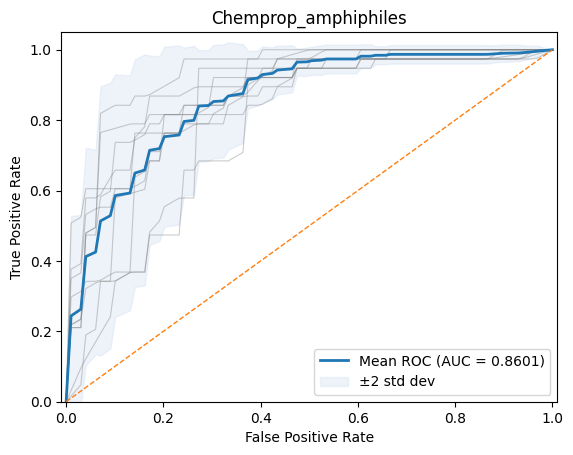

Chemeleon
ROC-AUC Score: 0.8719
ROC-AUC Score: 0.8921
ROC-AUC Score: 0.8031
ROC-AUC Score: 0.8654
ROC-AUC Score: 0.9114
ROC-AUC Score: 0.9496
ROC-AUC Score: 0.8917
ROC-AUC Score: 0.8724
ROC-AUC Score: 0.9070
ROC-AUC Score: 0.7996


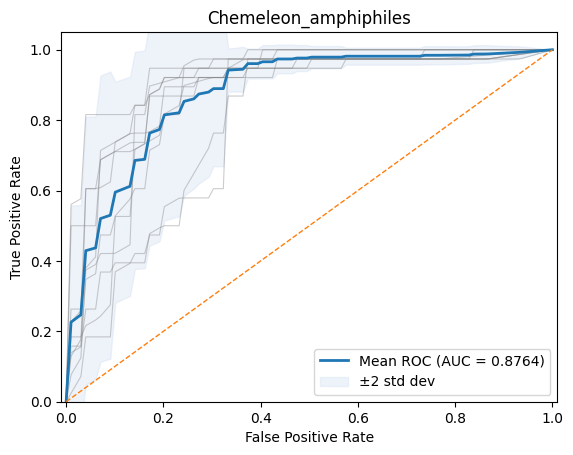

SMI-TED
ROC-AUC Score: 0.9004
ROC-AUC Score: 0.8759
ROC-AUC Score: 0.8298
ROC-AUC Score: 0.8627
ROC-AUC Score: 0.9105
ROC-AUC Score: 0.9456
ROC-AUC Score: 0.9057
ROC-AUC Score: 0.8680
ROC-AUC Score: 0.8974
ROC-AUC Score: 0.7961


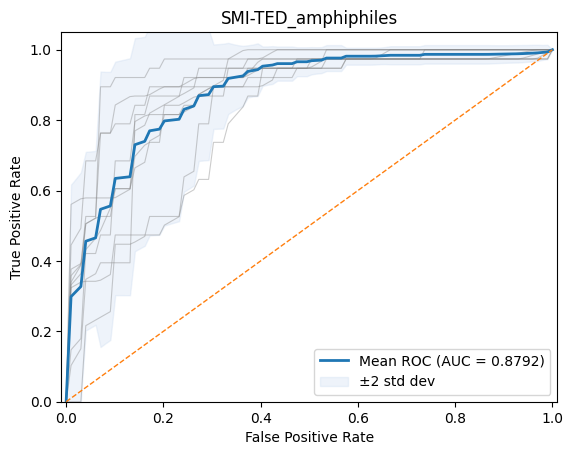

In [8]:
# For amphiphiles data
model_type = ['Baseline', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED']
dfs = [df03, df13, df23, df33, df43]

results_dict3 = {}

for df, model in zip(dfs, model_type):
    print(model)
    results_df = evaluate_model_performance_d(df, label_col = 'vesicles_formation', data_type='amphiphiles', model_type=model)
    results_dict3[model] = results_df
    # visualize_latent_space(df, data_type='amphiphiles', model_type=model)

In [10]:
joblib.dump(results_dict1, "results_dict1_RF.pkl")
joblib.dump(results_dict2, "results_dict2_RF.pkl")
joblib.dump(results_dict3, "results_dict3_RF.pkl")

['results_dict3_RF.pkl']